<a href="https://colab.research.google.com/github/afujii/class/blob/main/%E6%9C%80%E5%B0%A4%E6%8E%A8%E5%AE%9A%E6%B3%95%EF%BC%88%E3%83%AD%E3%82%B8%E3%82%B9%E3%83%86%E3%82%A3%E3%83%83%E3%82%AF%E5%9B%9E%E5%B8%B0%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 最尤推定法(ロジスティック回帰)
映像コンテンツの例をPythonコードで示す。初めにデータセットを作成する。

In [ ]:
# i x_i, N_i, y_i を LIST で表現した。
data = [[1,100,96,12],[2,120,99,21],[3,140,99,36],[4,160,97,61],[5,180,100,79],[6,200,98,83],[7,220,99,95],[8,240,100,99]]

はじめにデータの全体像を図示する。摂氏100度を1とする。

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [ ]:
x = np.array([d[1]/100.0 for d in data])
n = np.array([d[2] for d in data])
y = np.array([d[3] for d in data])
y_par_n = y/n

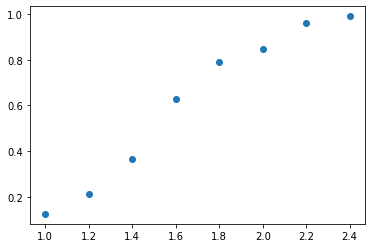

In [ ]:
from matplotlib import pyplot as plt

plt.scatter(x,y_par_n)

ロジスティック曲線　$ p(x|\beta_0,\beta_1) = \frac{exp(\beta_0 + \beta_1)}{1+exp(\beta_0+\beta_1x)} = \frac{1}{1+exp\{-(\beta_0+\beta_1x)\}}$ をこの点の集合にフィットさせることを行っていく。


加熱温度が　$x_i (C^\circ)$のとき、$N_i$個のサンプル中　$y_i$ 個の特性が変化する。この確率は、次の二項分布の式で表現できる。
 

$　{}_{N_i} C_{y_i} P_i^{y_i}(1-P_i)^{N_i - y_i} $

In [ ]:
from scipy.special import comb
def loglikelihood_function(Y, N, X, beta1, beta2):
    res = 0
    for y, n, x in zip(Y, N, X):
        res += y * (beta1 + beta2 * x) - n * np.log(1 + np.exp(beta1 + beta2 * x)) + np.log(comb(n, y))
    return res

$\beta_0 　と　\beta_1$ の範囲を適当に決めて、対数尤度の計算を行い、最適の組合せを計算する。付随的に、そのヒートマップを示すためのデータも取得しておく。

In [ ]:
RESOLUTION = 100
beta1_arr = np.linspace(-10, 10, RESOLUTION)
beta2_arr = np.linspace(-10, 10, RESOLUTION)

上記の範囲で探査した結果をres に格納して、pandas の DataFrame を利用すると、最大値となる変数を取得する　idxmax() を利用できる。

In [ ]:
from itertools import product
from tqdm import tqdm
res = []
for beta1, beta2 in tqdm(list(product(beta1_arr, beta2_arr))):
    loglikelihood = loglikelihood_function(Y=y, N=n, X=x, beta1=beta1, beta2=beta2)
    res.append([beta1, beta2, loglikelihood])
res = pd.DataFrame(res, columns=['beta1', 'beta2', 'loglikelihood'])
print(res[res.index == res['loglikelihood'].idxmax()])

100%|██████████| 10000/10000 [00:01<00:00, 6064.23it/s]


         beta1     beta2  loglikelihood
1771 -6.565657  4.343434     -18.642304


$\beta_0 = -6.57 ,  \beta_1 = 4.34 $ として、ロジスティック曲線を図示する。

In [ ]:
def logistic_func(beta1, beta2, x):
  return 1.0/(1.0 + np.exp(-(beta1+beta2*x)))

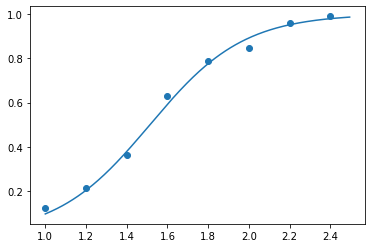

In [ ]:
X2 = np.arange(1.0, 2.5, 0.005)
Y2 = logistic_func( -6.57 , 4.34 , X2)
plt.scatter(x,y_par_n)
plt.plot(X2,Y2)